# Training Data Display and Analysis
This is notebook is for viewing the data gathered during training runs of our agent. We're currently only supporting one traning file, but in the future we're probably going to split the data up into multiple files.


In [10]:
import numpy as np
import matplotlib
from matplotlib import cm
from matplotlib import colors
from matplotlib import pyplot as plt

BRD_HEIGHT = 20
BRD_WIDTH = 10

data = np.load('training_data.npy').item()

print("Games Played: " + str(len(data['Value'])))
print("States in database: " + str(data['Reward'][0]))
print("Average reward: " + str(data['Reward'][1]))
print("Average when we don't increase block height: " + str(data['R|NotUp'][1]))
print("Average when we increase block height: " + str(data['R|Up'][1]))
print("Average when we cover blocks: " + str(data['R|Cover'][1]))

i = 1
while True:
    tag = "R|Lines_Cleared_" + str(i)
    if tag in data:
        print("Average when we clear " + str(i) + " lines: " + str(data[tag][1]))
    else:
        break
    i = i + 1
    
print("\nMax Value: " + str(np.max(data['Value'])))
print("Min Value: " + str(np.min(data['Value'])))

Games Played: 556
States in database: 31442
Average reward: 2.92891673558
Average when we don't increase block height: 22.2714012434
Average when we increase block height: -2.55995364179
Average when we cover blocks: -0.0174028341759
Average when we clear 1 lines: 21.1538619979
Average when we clear 2 lines: 38.9765625
Average when we clear 3 lines: 57.9090909091
Average when we clear 4 lines: 73.0

Max Value: 686
Min Value: -42


# Average Board State Representations

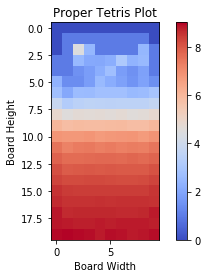

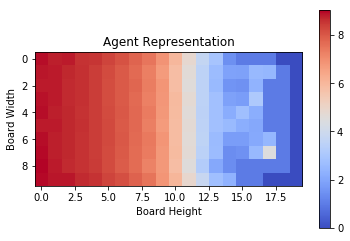

In [11]:
brd = data['Board']
grid = np.zeros((20,10))

for i in range(len(brd)):
    for j in range(len(brd[i])):
        grid[j][i] = brd[i,j,1]
            
plt.imshow(grid, cmap = cm.coolwarm)
plt.colorbar()

plt.title('Proper Tetris Plot')
plt.xlabel('Board Width')
plt.ylabel('Board Height')
plt.show()

grid = np.zeros((10,20))

for i in range(len(brd)):
    for j in range(len(brd[i])):
        grid[9 - i][19 - j] = brd[i][j][1]

plt.imshow(grid, cmap = cm.coolwarm)
plt.colorbar()
plt.title('Agent Representation')
plt.xlabel('Board Height')
plt.ylabel('Board Width')
plt.show()

# Learning Curve

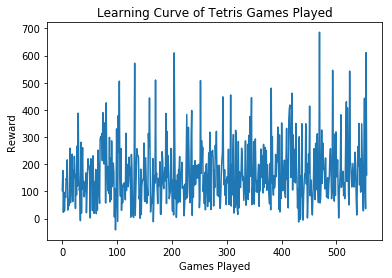

In [12]:
plt.plot(data['Value'])
plt.title('Learning Curve of Tetris Games Played')
plt.xlabel('Games Played')
plt.ylabel('Reward')
plt.show()